In [49]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up

### Extracting the data
##### Utilizing Yahoo finance's API in order to get the relevant that we need

In [60]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statenebt that the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one want to download
    # credit to john Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [61]:
# creating a list of the ticker names of the stocks we want to use for our portfolio. This will help us with inputting this data into yf to download and put it in a column for the pandas dataframe
stock_pick = ['AAPL', 'MSFT', 'BE', 'O', 'BND', 'KO', 'JPM']
etf_pick = ['SPY', 'IWM', 'DIA']

# this will download all of the relevant data related to our constituent's of selected stocks and etfs
portfolio_individual = import_securities_data(stock_pick, 1, "y")
portfolio_etf = import_securities_data(etf_pick, 1, "y")

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [62]:
# visualizing the data to make sure all the data was imported correctly
portfolio_individual

Price        Adj Close                                               \
Ticker            AAPL         BE        BND         JPM         KO   
Date                                                                  
2023-02-13  153.033157  23.299999  70.769058  138.611130  58.746586   
2023-02-14  152.386597  23.209999  70.526924  139.223648  57.767479   
2023-02-15  154.505310  24.410000  70.371971  139.806992  57.767479   
2023-02-16  152.893906  23.389999  70.100777  137.881958  57.408791   
2023-02-17  151.740067  23.490000  70.255753  138.290314  58.281265   
...                ...        ...        ...         ...        ...   
2024-02-06  189.058762  11.310000  72.760002  175.100006  59.939999   
2024-02-07  189.168625  11.300000  72.620003  175.429993  59.990002   
2024-02-08  188.080017  11.520000  72.430000  174.800003  59.830002   
2024-02-09  188.850006  11.530000  72.370003  175.009995  59.560001   
2024-02-12  188.244995  12.415000  72.430000  176.494995  59.544998   

Price                                   Close                        ...  \
Ticker            MSFT          O        AAPL         BE        BND  ...   
Date                                                                 ...   
2023-02-13  268.935364  63.619503  153.850006  23.299999  73.070000  ...   
2023-02-14  269.777954  62.255211  153.199997  23.209999  72.820000  ...   
2023-02-15  267.621613  62.908924  155.330002  24.410000  72.660004  ...   
2023-02-16  260.496796  62.823658  153.710007  23.389999  72.379997  ...   
2023-02-17  256.432587  62.643661  152.550003  23.490000  72.540001  ...   
...                ...        ...         ...        ...        ...  ...   
2024-02-06  405.489990  53.750000  189.300003  11.310000  72.760002  ...   
2024-02-07  414.049988  53.360001  189.410004  11.300000  72.620003  ...   
2024-02-08  414.109985  53.160000  188.320007  11.520000  72.430000  ...   
2024-02-09  420.549988  52.759998  188.850006  11.530000  72.370003  ...   
2024-02-12  418.922302  52.789799  188.244995  12.415000  72.430000  ...   

Price            Open                           Volume                    \
Ticker             KO        MSFT          O      AAPL       BE      BND   
Date                                                                       
2023-02-13  59.900002  267.640015  67.000000  62199000  2681800  3805800   
2023-02-14  60.209999  272.670013  67.029999  61707600  3639100  4328000   
2023-02-15  59.900002  268.320007  65.720001  65573800  2322500  4370800   
2023-02-16  59.230000  264.019989  65.830002  68167900  1970300  5912000   
2023-02-17  59.500000  259.390015  66.300003  59144100  1914900  5165700   
...               ...         ...        ...       ...      ...      ...   
2024-02-06  59.959999  405.880005  52.750000  43490800  3310600  8310500   
2024-02-07  60.070000  407.440002  53.750000  53439000  2931200  9257500   
2024-02-08  59.889999  414.049988  53.270000  40962000  2993200  7987500   
2024-02-09  59.470001  415.250000  53.029999  45099900  4076800  5940700   
2024-02-12  59.660000  420.554993  52.840000  19325011  2005435  2794998   

Price                                             
Ticker          JPM        KO      MSFT        O  
Date                                              
2023-02-13  7134600  16191800  44630900  2237800  
2023-02-14  9249400  20505700  37047900  3228300  
2023-02-15  6728300  13171400  28922400  2425900  
2023-02-16  8165300  16538300  29603600  2447500  
2023-02-17  7948800  16814700  30000100  2891900  
...             ...       ...       ...      ...  
2024-02-06  6764800  12775200  18382600  7198800  
2024-02-07  7225500  10259900  22340500  4686700  
2024-02-08  6060300  12874800  21225300  4484400  
2024-02-09  6295900  15231400  22012900  6514200  
2024-02-12  2945163   5776910   8710555  2270211  

[251 rows x 42 columns]

In [64]:
# visualizing the data to make sure all the data was imported correctly
portfolio_etf

Price        Adj Close                               Close              \
Ticker             DIA         IWM         SPY         DIA         IWM   
Date                                                                     
2023-02-13  335.928009  189.772293  406.649475  342.549988  192.600006   
2023-02-14  334.545288  189.683609  406.462311  341.140015  192.509995   
2023-02-15  335.055176  191.604980  407.782288  341.660004  194.460007   
2023-02-16  330.867767  189.772293  402.167603  337.390015  192.600006   
2023-02-17  332.294037  190.294510  401.162872  338.290009  193.130005   
...                ...         ...         ...         ...         ...   
2024-02-06  385.079987  193.669998  493.980011  385.079987  193.669998   
2024-02-07  386.670013  193.220001  498.100006  386.670013  193.220001   
2024-02-08  387.350006  196.149994  498.320007  387.350006  196.149994   
2024-02-09  386.720001  199.339996  501.200012  386.720001  199.339996   
2024-02-12  389.160004  203.350006  503.174988  389.160004  203.350006   

Price                         High                                 Low  \
Ticker             SPY         DIA         IWM         SPY         DIA   
Date                                                                     
2023-02-13  412.829987  342.559998  192.860001  412.970001  338.880005   
2023-02-14  412.640015  343.529999  193.949997  415.049988  338.410004   
2023-02-15  413.980011  341.670013  194.550003  414.059998  338.630005   
2023-02-16  408.279999  340.890015  194.869995  412.910004  337.309998   
2023-02-17  407.260010  338.429993  193.369995  407.510010  335.079987   
...                ...         ...         ...         ...         ...   
2024-02-06  493.980011  385.369995  193.800003  494.320007  383.500000   
2024-02-07  498.100006  387.450012  194.149994  498.529999  385.649994   
2024-02-08  498.320007  387.660004  196.369995  498.709991  385.510010   
2024-02-09  501.200012  387.500000  199.550003  501.649994  385.760010   
2024-02-12  503.174988  389.160004  203.455002  503.500000  386.450012   

Price                                     Open                          \
Ticker             IWM         SPY         DIA         IWM         SPY   
Date                                                                     
2023-02-13  189.309998  408.239990  338.880005  190.509995  408.720001   
2023-02-14  190.080002  408.510010  341.519989  191.279999  411.239990   
2023-02-15  190.529999  409.470001  339.459991  190.979996  410.350006   
2023-02-16  191.250000  408.140015  338.500000  191.800003  408.790009   
2023-02-17  190.970001  404.049988  335.720001  191.880005  406.059998   
...                ...         ...         ...         ...         ...   
2024-02-06  191.020004  492.049988  383.920013  191.699997  493.519989   
2024-02-07  192.039993  495.359985  386.390015  194.070007  496.290009   
2024-02-08  192.710007  497.260010  387.470001  193.360001  498.100006   
2024-02-09  196.449997  498.489990  387.190002  196.919998  498.839996   
2024-02-12  199.860001  501.019989  386.489990  199.869995  501.170013   

Price        Volume                      
Ticker          DIA       IWM       SPY  
Date                                     
2023-02-13  2653900  15754400  64913500  
2023-02-14  3501100  21889600  88389300  
2023-02-15  1967700  18721200  61555700  
2023-02-16  3229600  21366300  76431500  
2023-02-17  3034200  23892200  89257800  
...             ...       ...       ...  
2024-02-06  2507800  34689100  55918600  
2024-02-07  2797600  31713900  70556500  
2024-02-08  2549800  35370800  52343600  
2024-02-09  3523600  46091300  63917600  
2024-02-12  1316945  21832313  19619666  

[251 rows x 18 columns]

In [10]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column nad putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

# Part 1

#### Creating Portfolio Pandas Dataframe

##### Ticker Column

In [65]:
# creating a dictionary with an embeded list of the stock tickers in order to create a dataframe out of it
# here ticker is the title of our column and the list with the stock symbols is our values within our column that has the title ticker
stock_pick_dict = { 'ticker': ['AAPL', 'MSFT', 'BE', 'O', 'BND', 'KO', 'JPM']}

# creating the dataframe using pandas library
df = pd.DataFrame(stock_pick_dict)

# visualizing the dataframe
df

,ticker
0,AAPL
1,MSFT
2,BE
3,O
4,BND
5,KO
6,JPM


 ##### Portfolio Weight (Equally Weighted) Column

In [67]:
# all assets that are being held in this portfolio are equal weighted. so we want to make sure of that by taking the total of a pie, 100%, and divide it by the count of stocks that we have within our portfolio
df['portfolio_weight'] = np.divide(1, df['ticker'].count()).round(4)

df

,ticker,portfolio_weight
0,AAPL,0.1429
1,MSFT,0.1429
2,BE,0.1429
3,O,0.1429
4,BND,0.1429
5,KO,0.1429
6,JPM,0.1429


##### Annualized Volatility (Trailing 3 Month) Column

In [9]:
# filtering for data from three months ago using the pandas query function. credit to @https://stackoverflow.com/questions/59692194/pandas-filter-data-that-are-in-last-n-month-using-query

# creating a variable to get todays full date
now = pd.to_datetime('now')

# creating a variable that offsets today's date by 3 months
last_three_months = now - pd.DateOffset(months=3)

# leverging query dunction to filter for all of the data that is less than and equal to the offsetted data. This means that we've filtered for data between now and three months ago
portfolio_three_month_trail = portfolio_individual['Adj Close'].query('Date >= @last_three_months')

# visualizing data to check if the code is working correctly
portfolio_three_month_trail.head()

Ticker,AAPL,BE,BND,JPM,KO,MSFT,O
Date,,,,,,,
2023-11-13,184.564499,10.61,69.064919,144.886581,56.480270,365.937256,49.213829
2023-11-14,187.201126,12.35,69.907654,147.530273,56.648926,369.519989,51.423023
2023-11-15,187.770386,12.53,69.520981,148.822311,56.758057,369.670013,51.748486
2023-11-16,189.468246,12.42,69.937401,150.521835,56.698532,376.170013,52.359959
2023-11-17,189.448257,12.57,70.036545,151.883438,56.807663,369.850006,52.182430


In [ ]:
# setting a definition method to calculate the annual volatility of the stock portfolio
def calc_annual_vol(portfolio):

    # calculating the percentage change to get the daily returns
    daily_returns_data = portfolio.pct_change()

    # getting the annualized volatility for each of the stocks. Credit to Yves Hilpisch the author for the python for finance V.2018 (pg.19)
    annualized_volatility_data = (daily_returns_data.std() * np.sqrt(252)).round(4)

    return annualized_volatility_data

In [11]:
# using definition method to import the three month trailing portfolio and calculate the annual volatility of the portfolio
calc_annual_vol(portfolio_three_month_trail)

# creating a column for annualized volatility and importing the data to the respective ticker using the import data definition function
import_data(df, annualized_volatility_data, 'annualized_volatility')

# checking ordiginal dataset to make sure all of the data was appended to the corresponding ticker
df


,ticker,portfolio_weight,annualized_volatility
0,AAPL,0.1429,0.1740
1,MSFT,0.1429,0.1703
2,BE,0.1429,0.6429
3,O,0.1429,0.2206
4,BND,0.1429,0.0712
5,KO,0.1429,0.1148
6,JPM,0.1429,0.1162


##### Beta Againts ETFs (SPY, IWM, DIA) (Using Trailing 12-months) Columns

In [12]:
# creating a definition function to calculate beta. credit to: https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py look at the calculatebeta function
def beta_calc(stock_returns, market_returns):
    
    # calculating covariance of stock returns and market returns, using numpy's universal functions 
    covariance = np.cov(stock_returns, market_returns)

    # caluculating variance of market returns, using numpy's universal functions 
    variance = np.var(market_returns)
    
    # implementing the beta formula. here we are extracting the covariance of the stock market returns and market returns from the matrix that was created in the previous code with the covariance variable. we then take that covariance and divide it by the variance formula and return the value of that formula as the result of using the definition function
    return covariance[0,1] / variance

In [13]:
# calculating stock market returns
stock_adjclose_returns = portfolio_individual['Adj Close'].pct_change()

# calculating etf returns
etf_adjclose_returns = portfolio_etf['Adj Close'].pct_change()

# reseting the index so that it doesnt cause problems when im trying to iterate through the data set
stock_adjclose_returns.reset_index(inplace= True)
etf_adjclose_returns.reset_index(inplace= True)

In [15]:
# the logic of this for loop is to be able to grab an etf and then be able to get all stocks and its returns data to calculate the beta of all of the stocks against that one etf. then after it is done calculating the beta for each of the stocks against that one etf, it goes back and pulls another etf and starts calculating the beta for each of the stocks against the new selected etf

# looping through etf returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed etf and etf data holds the data related to the returns values
for etf_ticker, etf_data in etf_adjclose_returns.iloc[1:,1:].items():
    
    # this a counter variable, set up so that the for loop that is below can loop the same amount of times as the count of stocks that we have on our portfolio, which is 7. so we want the for loop to loop 7 times so that we can loop through all of the stock tickers
    counter = 0

    # looping through stock returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed stock and stock data holds the data related to the returns values
    for stock_ticker, stock_data in stock_adjclose_returns.iloc[1:,1:].items():
        
        # this is variable set up to calculate the beta of a stock returns against the returns of an etf. In this case we have grabbed one etf and we are looping through the list of stock symbols and extracting their respective reutrns data and applying the beta calculator method that we have created 
        beta = beta_calc(stock_data, etf_data)

        # takes the ticker that was selected from the for loop and finds the respective ticker's row in the original dataframe, named under the variable 'df'. Then, it creates a new column or finds the respective column and inputs the value respective to the row that the ticker matched on the original dataframe 
        df.loc[df['ticker'] == stock_ticker, f'Beta against {etf_ticker}'] = beta

        # this adds a 1 to the counter variable every time the for loop loop's through the set of instructions
        counter += 1

        # the purpose of this if statement is to renew counter to 0 if it equals the count of stocks that we have picked for our portfolio. we do this because we want to only loop throughout the for loop only for the amount of stocks that we have in our portfolio
        if counter == len(stock_pick): 
            
            # if we have reached the count of ticker symbols in our portfolio, then  we reset our counter by making it equal to 0
            counter = 0

            # lastly we set a break in order to get out of the loop and go back all the way back to the for loop with the etf data in order to grab the next etf that we want to compare our stocks against as our market
            break
            

In [16]:
# viewing the data to make sure all of the data was appended to the correct stock ticker
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267
3,O,0.1429,0.2206,0.876635,0.517343,0.697457
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321


##### Weekly Drawdrowns (Average and Maximum) Columns

In [17]:
# resampling our data so that we have our stock data based on end of the week data. In other words, we are taking the closing price of every Friday
Weekly_data = portfolio_individual[['High', 'Low']].resample('1w', label= 'right').last()

# viewing the data
Weekly_data

Price             High                                               \
Ticker            AAPL         BE        BND         JPM         KO   
Date                                                                  
2023-02-19  153.000000  23.520000  72.550003  142.830002  60.230000   
2023-02-26  147.190002  21.860001  72.029999  141.360001  59.910000   
2023-03-05  151.110001  22.895000  71.879997  143.740005  59.680000   
2023-03-12  150.940002  21.250000  72.830002  135.259995  60.139999   
2023-03-19  156.740005  17.840000  73.919998  128.479996  60.349998   
2023-03-26  160.339996  18.405001  74.419998  125.680000  61.020000   
2023-04-02  165.000000  20.620001  73.870003  130.339996  62.250000   
2023-04-09  164.960007  18.190001  74.599998  128.080002  63.040001   
2023-04-16  166.320007  18.382000  73.800003  139.119995  63.150002   
2023-04-23  166.449997  18.170000  73.769997  141.110001  64.269997   
2023-04-30  169.850006  16.740000  74.099998  138.320007  64.160004   
2023-05-07  174.300003  17.190001  73.860001  137.880005  64.209999   
2023-05-14  174.059998  13.265000  74.059998  136.990005  64.190002   
2023-05-21  176.389999  14.770000  72.940002  140.490005  63.099998   
2023-05-28  175.770004  14.090000  72.330002  137.600006  60.639999   
2023-06-04  181.779999  14.650000  73.019997  141.479996  61.320000   
2023-06-11  182.229996  15.320000  72.650002  141.800003  60.669998   
2023-06-18  186.990005  17.680000  72.830002  143.970001  62.169998   
2023-06-25  187.559998  15.980000  72.989998  139.179993  61.970001   
2023-07-02  194.479996  16.490000  72.709999  146.000000  60.349998   
2023-07-09  192.669998  17.120001  71.709999  145.839996  60.500000   
2023-07-16  191.179993  18.639999  72.849998  152.889999  61.040001   
2023-07-23  194.970001  17.639999  72.750000  156.139999  62.680000   
2023-07-30  196.630005  17.790001  72.309998  157.600006  62.770000   
2023-08-06  187.380005  17.110001  71.730003  157.800003  61.889999   
2023-08-13  178.619995  15.100000  71.470001  154.520004  61.200001   
2023-08-20  175.100006  14.825000  70.970001  149.500000  61.090000   
2023-08-27  179.149994  14.775000  71.220001  148.619995  60.570000   
2023-09-03  189.919998  15.438000  71.570000  148.080002  60.130001   
2023-09-10  180.240005  15.100000  71.169998  144.119995  58.410000   
2023-09-17  176.500000  15.590000  70.919998  149.729996  58.639999   
2023-09-24  177.080002  14.040000  70.510002  147.509995  57.970001   
2023-10-01  173.070007  13.710000  70.129997  148.759995  56.270000   
2023-10-08  177.990005  11.190000  68.940002  145.880005  53.290001   
2023-10-15  181.929993  12.000000  69.559998  153.110001  53.419998   
2023-10-22  175.419998  11.930000  68.379997  145.139999  55.020000   
2023-10-29  168.960007  10.870000  68.720001  139.100006  56.139999   
2023-11-05  176.820007  11.550000  70.169998  143.770004  57.590000   
2023-11-12  186.570007  10.960000  69.870003  146.479996  56.930000   
2023-11-19  190.380005  12.765000  70.699997  152.860001  57.340000   
2023-11-26  190.899994  13.290000  70.699997  154.440002  58.750000   
2023-12-03  191.559998  15.400000  71.839996  157.860001  58.689999   
2023-12-10  195.990005  14.130000  71.949997  158.779999  58.750000   
2023-12-17  198.399994  14.750000  73.529999  165.279999  59.169998   
2023-12-24  195.410004  14.980000  73.540001  168.229996  58.459999   
2023-12-31  194.399994  15.200000  73.709999  170.690002  58.980000   
2024-01-07  182.759995  14.390000  73.169998  173.380005  59.950001   
2024-01-14  186.740005  13.220000  73.639999  176.309998  60.459999   
2024-01-21  191.949997  11.429000  72.680000  170.570007  60.279999   
2024-01-28  194.759995  12.860000  72.820000  173.059998  59.490002   
2024-02-04  187.330002  12.000000  73.139999  175.820007  60.869999   
2024-02-11  189.990005  11.715000  72.400002  175.100006  59.580002   
2024-02-18  188.669907  12.330000  72.449997  176.634995  59.740002   

Price                  

In [18]:
# using the drawdown formula -->  (week low price - week high price) diveded by week high price --- and then taking the mean of each to get the average weekly drawdown. credit to Kayla, Ashanti and Edosa's repo
Average_Weekly_Drawdown = (Weekly_data['Low'].mean() - Weekly_data['High'].mean()) / Weekly_data['High'].mean()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, Average_Weekly_Drawdown, 'average_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954,-0.015151
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870,-0.017899
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267,-0.046209
3,O,0.1429,0.2206,0.876635,0.517343,0.697457,-0.015442
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985,-0.003944
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536,-0.011534
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321,-0.016975


In [19]:
# using the drawdown formula --> (week low price - week high price) divided by week high price --- and then taking the max of each variable within the formila  to get the maximum weekly drawdown. credit to Kayla, Ashanti and Edosa's repo
maximum_weekly_drawdown = (Weekly_data['Low'].min() - Weekly_data['High'].max()) / Weekly_data['High'].max()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, maximum_weekly_drawdown, 'maximum_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954,-0.015151,-0.265524
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870,-0.017899,-0.411625
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267,-0.046209,-0.588435
3,O,0.1429,0.2206,0.876635,0.517343,0.697457,-0.015442,-0.264910
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985,-0.003944,-0.085925
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536,-0.011534,-0.197915
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321,-0.016975,-0.303026


##### Total Returns Columns

In [73]:
# creating a variable to store the stock data that has historical data dating from 10 years ago
portfolio_individual_10y = import_securities_data(stock_pick, 10, 'y')

# viewing data
portfolio_individual_10y.head()



[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                  \
Ticker           AAPL  BE        BND        JPM         KO       MSFT   
Date                                                                    
2014-02-14  17.112667 NaN  62.033955  44.001976  28.342112  31.678162   
2014-02-18  17.175583 NaN  62.118164  44.259247  27.279184  31.746037   
2014-02-19  16.904411 NaN  62.064602  43.328510  27.009808  31.822390   
2014-02-20  16.708754 NaN  62.056931  43.570652  27.155413  32.025997   
2014-02-21  16.523149 NaN  62.102856  43.593365  27.068052  32.221127   

Price                      Close                 ...       Open             \
Ticker              O       AAPL  BE        BND  ...         KO       MSFT   
Date                                             ...                         
2014-02-14  25.754480  19.428213 NaN  81.059998  ...  38.599998  37.389999   
2014-02-18  26.192774  19.499643 NaN  81.169998  ...  37.980000  37.630001   
2014-02-19  26.291538  19.191786 NaN  81.099998  ...  37.500000  37.220001   
2014-02-20  26.489082  18.969643 NaN  81.089996  ...  37.060001  37.570000   
2014-02-21  26.797741  18.758928 NaN  81.150002  ...  37.590000  37.939999   

Price                     Volume                                             \
Ticker              O       AAPL  BE      BND       JPM        KO      MSFT   
Date                                                                          
2014-02-14  40.184109  272924400 NaN  4205900  13067300  16030100  31407500   
2014-02-18  40.736435  260251600 NaN  2767900  14983800  46098500  32834000   
2014-02-19  41.036823  313768000 NaN  1985600  18669900  26645100  29750400   
2014-02-20  41.414730  305858000 NaN  1079500  12457000  22639900  27526100   
2014-02-21  41.676357  278784800 NaN   592600  16790100  19419800  38021300   

Price                
Ticker            O  
Date                 
2014-02-14  1766784  
2014-02-18  2726544  
2014-02-19  2817360  
2014-02-20  2442847  
2014-02-21  2200534  

[5 rows x 42 columns]

In [21]:
# utilizing the total returns formula --> (ending value (with dividends) - beginning value) / beginning value -- here i utilized loc to identify the last dates for the adjusted close prices as our ending value and first dates for the open prices as our beginning value (assuming that the beggining of our investement was when the market opened, as orders for stocks start to get fulfilled when market opens). I then round the calculated number to three decimal places for better visibility and relavancy of the data
total_returns = (((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) * 100).round(3)

# viewing data
total_returns


Ticker
AAPL     880.013
BE           NaN
BND      -10.587
JPM      207.726
KO        52.793
MSFT    1021.740
O         32.596
dtype: float64

In [22]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, total_returns, 'total_returns')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954,-0.015151,-0.265524,880.013
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870,-0.017899,-0.411625,1021.740
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267,-0.046209,-0.588435,NaN
3,O,0.1429,0.2206,0.876635,0.517343,0.697457,-0.015442,-0.264910,32.596
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985,-0.003944,-0.085925,-10.587
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536,-0.011534,-0.197915,52.793
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321,-0.016975,-0.303026,207.726


##### Annualized Total Return

In [23]:
# utilizing the annualized total returns formula --> ((1+(ending value (with dividends) - beginning value) / beginning value) ^ (1/n))-1 -- here I used the same returns formula to calculate the returns. to the returns I then add 1 to calculate the overall returns. then I take one tenth of root of the overall total returns to annualize the data based on 10 years worth of data. I then subtract one from the left over number to get the annual return rate instead of the total growth over the period
annualized_ret = ((((1 + ((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open'] )) ** (1/10)) - 1) * 100).round(3)

# viewing the data
annualized_ret

Ticker
AAPL    25.639
BE         NaN
BND     -1.113
JPM     11.896
KO       4.330
MSFT    27.347
O        2.862
dtype: float64

In [24]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, annualized_ret, 'annualized_total_return')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954,-0.015151,-0.265524,880.013,25.639
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870,-0.017899,-0.411625,1021.740,27.347
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267,-0.046209,-0.588435,NaN,NaN
3,O,0.1429,0.2206,0.876635,0.517343,0.697457,-0.015442,-0.264910,32.596,2.862
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985,-0.003944,-0.085925,-10.587,-1.113
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536,-0.011534,-0.197915,52.793,4.330
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321,-0.016975,-0.303026,207.726,11.896


##### Part One Results

In [25]:
# lets see our pandas dataframe final results!!
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1740,0.971121,0.393515,1.110954,-0.015151,-0.265524,880.013,25.639
1,MSFT,0.1429,0.1703,0.861950,0.237679,1.114870,-0.017899,-0.411625,1021.740,27.347
2,BE,0.1429,0.6429,2.889811,1.976528,2.356267,-0.046209,-0.588435,NaN,NaN
3,O,0.1429,0.2206,0.876635,0.517343,0.697457,-0.015442,-0.264910,32.596,2.862
4,BND,0.1429,0.0712,0.062834,0.048007,0.074985,-0.003944,-0.085925,-10.587,-1.113
5,KO,0.1429,0.1148,0.530626,0.149589,0.371536,-0.011534,-0.197915,52.793,4.330
6,JPM,0.1429,0.1162,1.138721,0.533295,0.884321,-0.016975,-0.303026,207.726,11.896


# Part 2

##### Create a table Showing Portfolio Risk Against The Three ETFs

##### Ticker Column

In [27]:
# creating a dictionary with an embeded list of the stock tickers in order to create a dataframe out of it
# we can maybe automate this portion by creating a definition. or maybe even put it under class where we can include the import_data definition under the class as well

etf_pick_dict = { 'ticker': etf_pick}

# creating the pandas dataframe
df2 = pd.DataFrame(etf_pick_dict)

#visualizing the dataframe
df2

,ticker
0,SPY
1,IWM
2,DIA


##### Correlation Against ETF Column

In [28]:
# getting the daily returns of each of the individual stocks
annual_ret_portfolio_individual = portfolio_individual['Adj Close'].pct_change().dropna()

# summing all of the stock daily returns horizontally and creating a new column to store the portfolio returns for that date. hence we get the column stating the daily returns of our portfolio
annual_ret_portfolio_individual['port_ret_daily'] = annual_ret_portfolio_individual.sum(axis=1)

#getting the daily returns data for each of ETFs as they are going to act as our market benchmark
annual_ret_portfolio_etf = portfolio_etf['Adj Close'].pct_change().dropna()


In [30]:
# creating a definition methos for correlation to calculate the correlation of our portfolio agains the etfs
def calc_port_corr(equity_port_ret_data, etf_ret_data, portfolio):

    # we set this up for the purpose of being able to use our import_data method function. this is the method that data is read in the method function. this allows us to convert whatever data tahat we append here from the for loop into a pandas dataframe in the import_data method
    etf_corr_data = {
                'Ticker': [],
                 0: [] 
                 }
    
    # create a for loop that reads the coumn names which contains the names of our etfs in the data frame
    for etf in etf_ret_data.columns:

        #we take the returns of our portfolio and the returns of the respective etf and apply the correlation method in python to calculate correlation. we then append the result of thatcalculation to the 0 column in our etf_corr_data dictionary to store our value
        etf_corr_data[0].append(equity_port_ret_data[portfolio].corr(etf_ret_data[etf]))

        # this appends the current etf ticker that we are looping to to the ticker column in our etf_corr_data dictionary
        etf_corr_data['Ticker'].append(etf)
    
    # the etf_corr_data dictionary is returned with all of the data that we've appended to the respective column using the for loop. to later be used in the import_data method
    return etf_corr_data

In [31]:
# utilizing the calc_port_corr method to calculate the correlation of etd against tour portfolio returns
corr = calc_port_corr(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [32]:
# importing the data into the original file named df2 using the import data method that was created
import_data(df2, corr, 'Correlation Against ETF')

df2

,ticker,Correlation Against ETF
0,SPY,0.812749
1,IWM,0.768117
2,DIA,0.791713


##### Covariance of Portfolio Against ETF

In [34]:
# creating method to calculate the covariance of the portfolio returns against the chosen etfs returns
def calc_cov(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary needed to append data and used later for import_data method
    covariance_data = {
        'Ticker': [],
            0: [] 
            }
    
    # for loop to loop through the columns of hte etf data and get the column names of the dataframe which contains the symbols for the chosen etfs
    for etf in etf_ret_data.columns:

        # utilizing the covariance universal function for numpy to calculate the covaraince of the portfolio returns against the etf returns
        covariance_matrix = np.cov(equity_port_ret_data[portfolio], etf_ret_data[etf])

        # this appends the current etf ticker that we are looping to to the ticker column in our covariance_data dictionary
        covariance_data['Ticker'].append(etf)

        # appending the correlation values to the 0 column in the covariance_data dictionary
        covariance_data[0].append(covariance_matrix[0, 1])

    # returning the covariance data dictionary for later usage in our code when trying to import to our original dataframe
    return covariance_data

In [35]:
# utlizing the calc_cov method to calculate the covariance of our portfolio returns against each of the etfs
cov_data = calc_cov(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

{'Ticker': ['DIA', 'IWM', 'SPY'],
 0: [0.000341652167039762, 0.0006114708467359537, 0.0003993361418194653]}

In [36]:
# importing the covariance data that was calculated into the original dataframe
import_data(df2, cov_data, 'Covariance of Portfolio vs ETF')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF
0,SPY,0.812749,0.000399
1,IWM,0.768117,0.000611
2,DIA,0.791713,0.000342


##### Tracking Errors (Using Trailing 10-years) Column

In [37]:
# credit to https://www.youtube.com/watch?v=0oU5dfzo040, and Alex Guerrero
def calc_track_err(equity_port_ret_data, etf_ret_data, portfolio):
    
    track_err_data = {
        'Ticker': [],
            0: [] 
            }
    
    for etf in etf_ret_data.columns:
        
        # calculating the difference between the portfolio returns and the etf return
        port_bench_ret_diff = equity_port_ret_data[portfolio] - etf_ret_data[etf]
        
        # taking the etf ticker that has been looped and appending it to the ticker column in the track_err_data dictionary
        track_err_data['Ticker'].append(etf)

        # getting the standard deviation of the difference between the portfolio returns and etf returns and appending it to the 0 column in the track_err_data column
        track_err_data[0].append(port_bench_ret_diff.std())

    return track_err_data

In [38]:
# importing 10 years woth of historical data for the selected stocks and etfs
portfolio_equity_10y = import_securities_data(stock_pick, '10y')
portfolio_etf_10y = import_securities_data(etf_pick, '10y')

# getting the daily returns of each stock and then summing them up horizontally to get the portfolio daily returns
decade_trail_ret_portfolio_equity = portfolio_equity_10y['Adj Close'].pct_change().dropna()
decade_trail_ret_portfolio_equity['port_ret_daily'] = decade_trail_ret_portfolio_equity.sum(axis=1)

# getting the etfs daily returns
decade_trail_ret_portfolio_etf = portfolio_etf_10y['Adj Close'].pct_change().dropna()

[                       0%%                      ]

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [39]:
# using the created method to calculate the tracking error and inputting the relevant data
TE = calc_track_err(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# using the import data method to import the data into the dataframe
import_data(df2, TE,'Tracking Errors')

# visualizing the dataframe
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors
0,SPY,0.812749,0.000399,0.09646
1,IWM,0.768117,0.000611,0.09441
2,DIA,0.791713,0.000342,0.09692


##### Sharpe-Ratio (Using Current Risk-Free Rate)

In [40]:
# creating a method to calculate the sharpe ratio. sharpe ratio Credit: https://www.youtube.com/watch?v=s0bxoD_0fAU

def calc_sharpe_ratio(etf_ret_data):

    sharpe_ratio_data = {
        'Ticker': [],
            0: [] 
            }
    
    # creating web-scraper to get current risk-free rate from the web. we use the 10-year treasury yield rate for this from yahoo finance. credit: https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1s
    # getting necessary libraries
    import requests
    from bs4 import BeautifulSoup

    # sending a request to yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/quote/%5ETNX?p=%5ETNX').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the risk free rate
    risk_free_rate_10yr = soup.find('td' , class_ = 'Ta(end) Fw(600) Lh(14px)').text

    # take the text and convert it into a float number
    risk_free_rate_10yr = float(risk_free_rate_10yr.strip())

    # calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe
    daily_risk_free_rate = ((1 + (risk_free_rate_10yr/100)) ** (1/252)) -1
    
    
    for etf in etf_ret_data.columns:

        # Calculate excess returns by subtracting the risk-free rate
        excess_returns = etf_ret_data[etf] - daily_risk_free_rate

        # Calculate the average excess return
        average_excess_return = np.mean(excess_returns)
        
        # Calculate the standard deviation of excess returns
        std_excess_return = np.std(excess_returns)
        
        # append the ticker to the Ticker column in our sharpe ratio data dictionary
        sharpe_ratio_data['Ticker'].append(etf)
        
        # Calculate the Sharpe Ratio and append to the 0 column in our sharpe ratio data dictionary
        sharpe_ratio_data[0].append(average_excess_return / std_excess_return)
    
    return sharpe_ratio_data

In [41]:
# using the calc_sharpe_ratio method to calculate our sharpe ratio for each of our etf
sharpe_ratios = calc_sharpe_ratio(decade_trail_ret_portfolio_etf)

# importing the data into our dataframe
import_data(df2, sharpe_ratios, 'Sharpe Ratio')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio
0,SPY,0.812749,0.000399,0.09646,0.033951
1,IWM,0.768117,0.000611,0.09441,0.016006
2,DIA,0.791713,0.000342,0.09692,0.030623


##### Annual Volatility (252 days) Spread Column

In [42]:
# creating a method to calculate the annual volatility spread
def calc_annual_vol_spread(equity_port_ret_data, etf_ret_data, portfolio):

    annual_vol_spread_data = {
        'Ticker': [],
        0: [] 
        }

    for etf in etf_ret_data.columns:

        # getting the standard deviation of our etf daily returns
        etf_vol = etf_ret_data[etf].std()

        # getting the standard deviation of our equity portfolio daily returns
        port_vol = equity_port_ret_data[portfolio].std()

        # appending the etf ticker to the Ticker column in the dictionary
        annual_vol_spread_data['Ticker'].append(etf)

        # calculating the annualized volatility spread and appending it to the 0 column in the dictionary
        annual_vol_spread_data[0].append(((port_vol - etf_vol) * np.sqrt(252)))
    
    return annual_vol_spread_data

In [43]:
# calculating the annual volatility spread of portfolio against the etfs using the method that was created
spread_data = calc_annual_vol_spread(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# importing the data into the original data frame
import_data(df2, spread_data, 'Annualized Volatility Spread')

# visualizing the current data frame
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.812749,0.000399,0.09646,0.033951,1.526571
1,IWM,0.768117,0.000611,0.09441,0.016006,1.480209
2,DIA,0.791713,0.000342,0.09692,0.030623,1.527786


##### Part 2 Complete: Results

In [74]:
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.812749,0.000399,0.09646,0.033951,1.526571
1,IWM,0.768117,0.000611,0.09441,0.016006,1.480209
2,DIA,0.791713,0.000342,0.09692,0.030623,1.527786


# Part 3

##### creating covariance matrix chart

In [45]:
# importing all of the securities data trailing 1 year
corr_matrix_data = import_securities_data(stock_pick + etf_pick, '1y')

# calculating the correlation matrix using corr method and specifying that we want the correlation to follow pearson correlation method
corr_matrix_data = corr_matrix_data['Adj Close'].corr(method = 'pearson')

# visualizing datafrane
corr_matrix_data

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,BE,BND,DIA,IWM,JPM,KO,MSFT,O,SPY
Ticker,,,,,,,,,,
AAPL,1.000000,-0.562836,0.272869,0.724796,0.510207,0.707584,0.047926,0.878234,-0.278532,0.854315
BE,-0.562836,1.000000,0.135833,-0.428432,0.130017,-0.454695,0.364961,-0.730897,0.804327,-0.546827
BND,0.272869,0.135833,1.000000,0.536845,0.538557,0.377757,0.715899,0.312044,0.563773,0.383591
DIA,0.724796,-0.428432,0.536845,1.000000,0.762650,0.962722,0.137712,0.856439,-0.121234,0.957736
IWM,0.510207,0.130017,0.538557,0.762650,1.000000,0.759522,0.281042,0.463210,0.352855,0.712837
JPM,0.707584,-0.454695,0.377757,0.962722,0.759522,1.000000,-0.005120,0.835070,-0.194822,0.945114
KO,0.047926,0.364961,0.715899,0.137712,0.281042,-0.005120,1.000000,-0.052608,0.723839,0.019949
MSFT,0.878234,-0.730897,0.312044,0.856439,0.463210,0.835070,-0.052608,1.000000,-0.422945,0.930706
O,-0.278532,0.804327,0.563773,-0.121234,0.352855,-0.194822,0.723839,-0.422945,1.000000,-0.267307


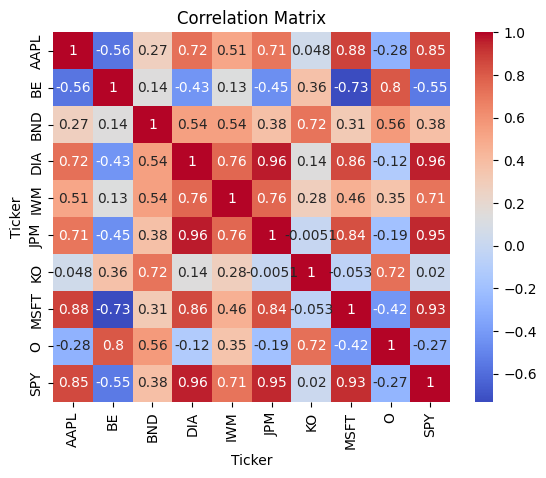

In [46]:
# plotting the correlation method in a Heatmap. credit to Alex Guerrero
sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()